In [1]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
# import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [2]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [3]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [4]:
# num_classes = dataset.num_classes
# num_classes

In [5]:
#Loading the dataset

names = [
    datasets.LionData,
    datasets.SealIDSegmented,
    datasets.SeaStarReID2023,
    datasets.StripeSpotter,
]

In [6]:
l = [
 'datasets.LionData',
 'datasets.SealIDSegmented',
 'datasets.SeaStarReID2023',
 'datasets.StripeSpotter']

In [7]:
roots = ['data/' + str(dataset).split('.')[1] for dataset in l]
roots

['data/LionData',
 'data/SealIDSegmented',
 'data/SeaStarReID2023',
 'data/StripeSpotter']

data/SeaStarReID2023


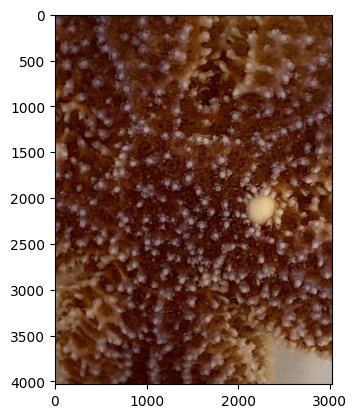

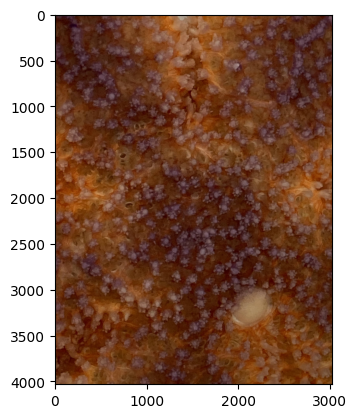

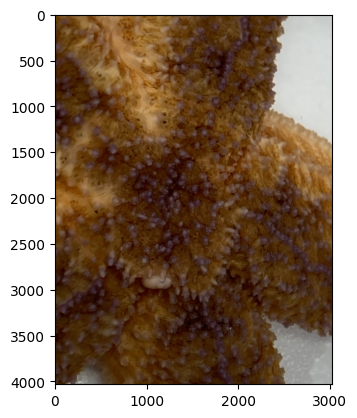

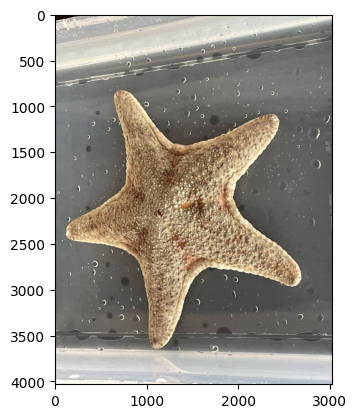

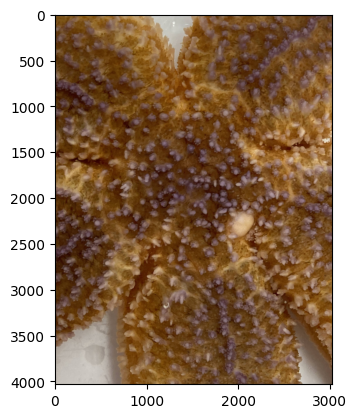

In [8]:
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split

root = roots[2]
print(root)
m = names[2](root)
print(m)
df = m.df
plot_bbox_segmentation(df, root, 5)

In [9]:
df

,image_id,identity,path,species
0,0019d2ea2b1cd4af,Asru71,sea-star-re-id\Asru71\IMG_8168.jpg,Asteria rubens
1,002605b01eababfc,Asru65,sea-star-re-id\Asru65\IMG_9597.jpg,Asteria rubens
2,0048b09774b69e92,Asru54,sea-star-re-id\Asru54\IMG_8056.jpg,Asteria rubens
3,004f9b4ebca29657,Anau34,sea-star-re-id\Anau34\IMG_3865.jpg,Anthenea australiae
4,0063b9794114d86c,Asru54,sea-star-re-id\Asru54\IMG_6687.jpg,Asteria rubens
...,...,...,...,...
2182,feab472e112904e3,Asru69,sea-star-re-id\Asru69\IMG_7523.jpg,Asteria rubens
2183,fec961bf1354a6ee,Asru53,sea-star-re-id\Asru53\IMG_7494.jpg,Asteria rubens
2184,ff4efa7c5755dadd,Asru58,sea-star-re-id\Asru58\IMG_7158.jpg,Asteria rubens
2185,ffd93ae873852f0b,Anau53,sea-star-re-id\Anau53\IMG_4211.jpg,Anthenea australiae


Number of identitites            95
Number of all animals            2187
Number of animals with one image 0
Number of unidentified animals   0


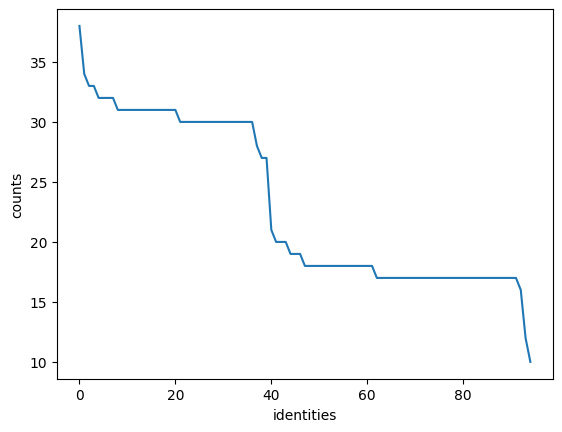

In [10]:
display_statistics(df)

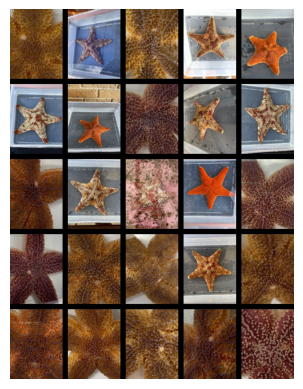

In [11]:
m.plot_grid(n_cols=5);

In [12]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'species'], dtype='object')


In [13]:
unique_categories = df['identity'].unique()
print(unique_categories)

['Asru71' 'Asru65' 'Asru54' 'Anau34' 'Asru51' 'Asru56' 'Asru72' 'Asru67'
 'Anau31' 'Anau52' 'Anau06' 'Asru18' 'Asru64' 'Asru50' 'Asru53' 'Asru62'
 'Anau08' 'Anau35' 'Anau14' 'Asru66' 'Anau23' 'Asru78' 'Asru46' 'Asru63'
 'Anau21' 'Anau04' 'Anau03' 'Asru52' 'Anau55' 'Anau12' 'Anau27' 'Asru74'
 'Anau39' 'Asru77' 'Asru60' 'Asru20' 'Anau24' 'Anau45' 'Asru47' 'Anau09'
 'Asru73' 'Asru70' 'Asru68' 'Asru57' 'Asru49' 'Anau22' 'Anau05' 'Anau48'
 'Anau36' 'Anau26' 'Anau44' 'Asru69' 'Anau38' 'Anau30' 'Asru26' 'Anau25'
 'Anau10' 'Anau18' 'Asru23' 'Anau11' 'Asru55' 'Anau37' 'Anau46' 'Anau50'
 'Anau17' 'Asru76' 'Asru24' 'Asru21' 'Asru61' 'Asru45' 'Anau43' 'Asru75'
 'Anau33' 'Asru58' 'Anau42' 'Anau15' 'Anau40' 'Asru48' 'Anau13' 'Anau20'
 'Anau01' 'Anau49' 'Anau16' 'Anau29' 'Anau54' 'Anau56' 'Anau47' 'Anau53'
 'Anau07' 'Anau19' 'Anau41' 'Anau32' 'Anau28' 'Anau51' 'Anau02']


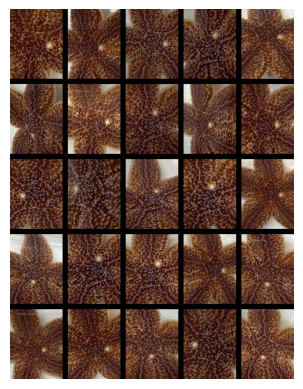

In [14]:
m.plot_grid(n_cols=5, idx=df['identity']=='Asru71');

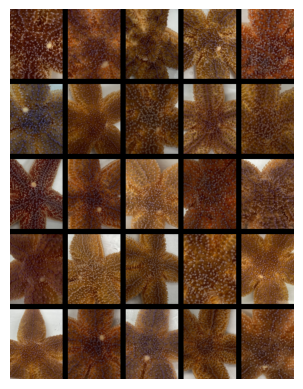

In [15]:
m.plot_grid(n_cols=5, idx=df['species']=='Asteria rubens');

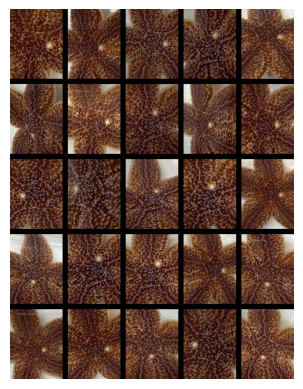

In [16]:
m.plot_grid(n_cols=5, idx=(df['species']=='Asteria rubens')*(df['identity']=='Asru71'));

In [17]:
print(m)

In [18]:
df

,image_id,identity,path,species
0,0019d2ea2b1cd4af,Asru71,sea-star-re-id\Asru71\IMG_8168.jpg,Asteria rubens
1,002605b01eababfc,Asru65,sea-star-re-id\Asru65\IMG_9597.jpg,Asteria rubens
2,0048b09774b69e92,Asru54,sea-star-re-id\Asru54\IMG_8056.jpg,Asteria rubens
3,004f9b4ebca29657,Anau34,sea-star-re-id\Anau34\IMG_3865.jpg,Anthenea australiae
4,0063b9794114d86c,Asru54,sea-star-re-id\Asru54\IMG_6687.jpg,Asteria rubens
...,...,...,...,...
2182,feab472e112904e3,Asru69,sea-star-re-id\Asru69\IMG_7523.jpg,Asteria rubens
2183,fec961bf1354a6ee,Asru53,sea-star-re-id\Asru53\IMG_7494.jpg,Asteria rubens
2184,ff4efa7c5755dadd,Asru58,sea-star-re-id\Asru58\IMG_7158.jpg,Asteria rubens
2185,ffd93ae873852f0b,Anau53,sea-star-re-id\Anau53\IMG_4211.jpg,Anthenea australiae


In [19]:
df['path'][0]

'sea-star-re-id\\Asru71\\IMG_8168.jpg'

In [21]:
dataset_path_prefix = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\SeaStarReID2023\\'
df['path'] = df['path'].apply(lambda x: os.path.join(dataset_path_prefix, x))

df['path'][0]

'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\SeaStarReID2023\\sea-star-re-id\\Asru71\\IMG_8168.jpg'

Number of images: 2187
Number of unique labels: 95


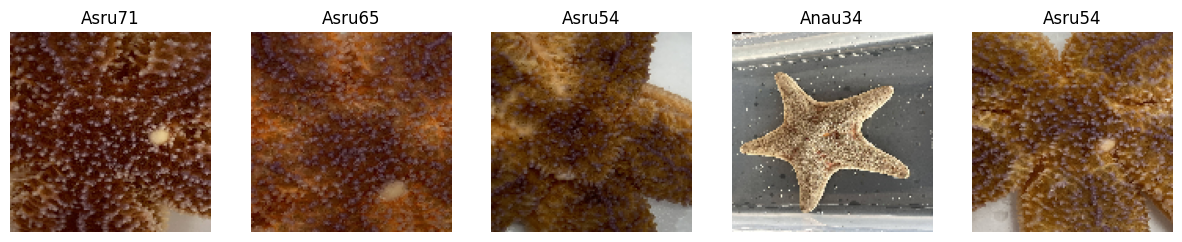

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
def load_images_from_dataframe(dataframe, target_size=(256, 256)):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        file_path = row['path']
        image = cv2.imread(file_path)
        if image is not None:
            # Resize image to target size
            resized_image = cv2.resize(image, target_size)
            images.append(resized_image)
            labels.append(row['identity'])
    return images, labels

# Modify target_size as needed, e.g., (128, 128) for smaller images
target_size = (128, 128)
images, labels = load_images_from_dataframe(df, target_size=target_size)

# Print the count of images and unique labels
print(f"Number of images: {len(images)}")
print(f"Number of unique labels: {len(set(labels))}")

# Plot a sample of images with their corresponding labels
num_samples = min(5, len(images))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [23]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [24]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [25]:
# Extract features from database images
database_features = []
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    database_features.append((keypoints, descriptors))

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0
c = 0
# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    # Initialize dictionary to store similarity scores
    similarity_scores = {}
    
    # Compare query features with database features
    for i, (db_keypoints, db_descriptors) in enumerate(database_features):
        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        # Convert descriptors to the same type
        if db_descriptors is None:
            c+=1
            continue
        query_descriptors = query_descriptors.astype(np.float32)
        db_descriptors = db_descriptors.astype(np.float32)

        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(query_descriptors, db_descriptors, k=2)

        # Check if matches exist
        if len(matches) < 2:
            continue
        
        # Apply ratio test
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        
        # Calculate similarity score (e.g., based on the number of good matches)
        similarity_score = len(good_matches)
        
        # Store similarity score for this database image
        similarity_scores[i] = similarity_score
    
    # Sort similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top-k most similar images
    top_k = 5  # Adjust as needed
    top_k_indices = [index for index, _ in sorted_scores[:top_k]]
    
    # Get the predicted label for each top-k image
    predicted_labels = [database_labels[index] for index in top_k_indices]
    
    # Check if the query label matches any of the predicted labels
    if query_label in predicted_labels:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)

Accuracy: 0.76
